In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:800px;  /* your desired max-height here */
    overflow: auto;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('utilization_reshaped.csv')
df.timestamp = pd.to_datetime(df.timestamp)

In [4]:
df.service.unique()

array(['Voucher', 'Vendor', 'Utilities', 'Uploadedvouchers',
       'Transitionlayer', 'Templates', 'Telemetry', 'Tax',
       'Supergiftcard', 'Smartwebsync', 'Search', 'Retail', 'Refund',
       'Purchaseorders', 'Providerintegrations', 'Productsaggregator',
       'Paymentspublic', 'Payments', 'Packinglist', 'Orders', 'Navproxy',
       'Mobilepay', 'Messaging', 'Mainsite', 'Logistics', 'Localgiftcard',
       'Financeinternal', 'Finance', 'Exchangerate', 'Dwhexport', 'Cms',
       'Catalog', 'Basket', 'Barcodes', 'B2b', 'Authinternal', 'Auth',
       'Audit', 'Api', 'Activationreports'], dtype=object)

<Figure size 432x288 with 0 Axes>

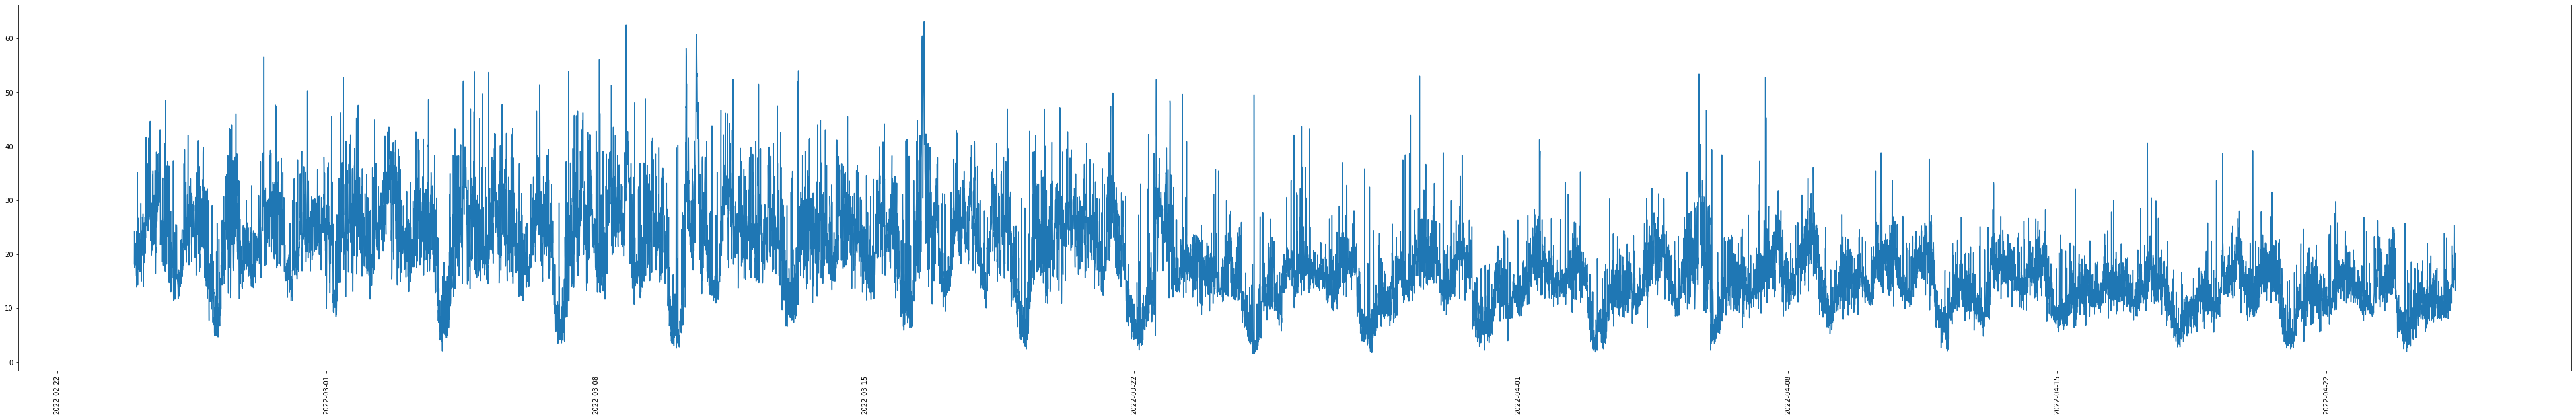

In [5]:
exch_df = df.loc[df.service == 'Exchangerate'].drop('service', axis=1)
plt.tight_layout()
plt.figure(figsize=(68, 10))
plt.tick_params(axis='x', rotation=90)
plt.plot(exch_df.timestamp, exch_df.cpu)

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [7]:
scaler = StandardScaler()

cpu_norm = scaler.fit_transform(exch_df.cpu.values.reshape(-1, 1)).reshape(1, -1)[0]
memory_norm = scaler.fit_transform(exch_df.cpu.values.reshape(-1, 1)).reshape(1, -1)[0]

normalized_df = pd.DataFrame({'cpu':cpu_norm, 'memory':memory_norm})

In [8]:
pca = PCA(n_components = 1)
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
output = pca.fit_transform(normalized_df[['cpu', 'memory']]).reshape(1, -1)[0]
output_df = pd.DataFrame({'timestamp': exch_df.timestamp, 'value': output})
output_df.timestamp = min_max_scaler.fit_transform(output_df.timestamp.values.reshape(-1, 1))
output_df.index = output_df.timestamp
output_df = output_df.drop(output_df.columns[0], axis=1)

In [9]:
window_size = 50

series_s = output_df.copy()
for i in range(window_size):
    output_df = pd.concat([output_df, series_s.shift(-(i+1))], axis = 1)
    
output_df = output_df.dropna()

In [10]:

nrow = round(0.8*output.shape[0])
train = output_df.iloc[:nrow]
test = output_df.iloc[nrow:]

In [11]:
output_df

,value,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
timestamp,,,,,,,,,,,,,,,,,,,,,
-1.000000,-0.038152,1.026904,0.355836,-0.150675,0.604648,-0.024268,0.351141,0.416927,0.002441,0.250444,...,0.319028,0.757013,0.065272,0.303805,0.331724,0.087070,-0.281241,0.536236,1.313244,1.934826
-0.999885,1.026904,0.355836,-0.150675,0.604648,-0.024268,0.351141,0.416927,0.002441,0.250444,0.393878,...,0.757013,0.065272,0.303805,0.331724,0.087070,-0.281241,0.536236,1.313244,1.934826,0.230744
-0.999770,0.355836,-0.150675,0.604648,-0.024268,0.351141,0.416927,0.002441,0.250444,0.393878,-0.062048,...,0.065272,0.303805,0.331724,0.087070,-0.281241,0.536236,1.313244,1.934826,0.230744,-0.606932
-0.999655,-0.150675,0.604648,-0.024268,0.351141,0.416927,0.002441,0.250444,0.393878,-0.062048,0.390793,...,0.303805,0.331724,0.087070,-0.281241,0.536236,1.313244,1.934826,0.230744,-0.606932,-0.109221
-0.999540,0.604648,-0.024268,0.351141,0.416927,0.002441,0.250444,0.393878,-0.062048,0.390793,0.641079,...,0.331724,0.087070,-0.281241,0.536236,1.313244,1.934826,0.230744,-0.606932,-0.109221,0.516889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.993786,-1.324609,-1.820568,-1.202773,-0.899828,-0.616799,-1.438655,-1.433014,-0.956587,-1.142573,-0.974761,...,-0.663387,0.552034,1.221125,0.569040,-0.265464,-0.561733,-0.042392,-0.039520,0.320861,-0.378618
0.993901,-1.820568,-1.202773,-0.899828,-0.616799,-1.438655,-1.433014,-0.956587,-1.142573,-0.974761,-1.001794,...,0.552034,1.221125,0.569040,-0.265464,-0.561733,-0.042392,-0.039520,0.320861,-0.378618,0.207620
0.994016,-1.202773,-0.899828,-0.616799,-1.438655,-1.433014,-0.956587,-1.142573,-0.974761,-1.001794,-1.232827,...,1.221125,0.569040,-0.265464,-0.561733,-0.042392,-0.039520,0.320861,-0.378618,0.207620,-0.649487


In [12]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1) 
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape = (50, 1), return_sequences = True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(256))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation(activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=20,epochs=150,validation_split=0.1)

Epoch 1/150
626/626 [==============================] - 13s 16ms/step - loss: 0.8375 - accuracy: 0.0000e+00 - val_loss: 0.3606 - val_accuracy: 0.0000e+00
Epoch 2/150
626/626 [==============================] - 9s 15ms/step - loss: 0.8155 - accuracy: 0.0000e+00 - val_loss: 0.3617 - val_accuracy: 0.0000e+00
Epoch 3/150
626/626 [==============================] - 9s 15ms/step - loss: 0.8093 - accuracy: 0.0000e+00 - val_loss: 0.3717 - val_accuracy: 0.0000e+00
Epoch 4/150
626/626 [==============================] - 9s 15ms/step - loss: 0.8094 - accuracy: 0.0000e+00 - val_loss: 0.3700 - val_accuracy: 0.0000e+00
Epoch 5/150
626/626 [==============================] - 10s 17ms/step - loss: 0.8056 - accuracy: 0.0000e+00 - val_loss: 0.3830 - val_accuracy: 0.0000e+00
Epoch 6/150
626/626 [==============================] - 11s 17ms/step - loss: 0.8046 - accuracy: 0.0000e+00 - val_loss: 0.3878 - val_accuracy: 0.0000e+00
Epoch 7/150
626/626 [==============================] - 11s 17ms/step - loss: 0.7992 -

626/626 [==============================] - 18s 29ms/step - loss: 0.1499 - accuracy: 0.0000e+00 - val_loss: 0.5059 - val_accuracy: 0.0000e+00
Epoch 108/150
626/626 [==============================] - 26s 42ms/step - loss: 0.1322 - accuracy: 0.0000e+00 - val_loss: 0.5234 - val_accuracy: 0.0000e+00
Epoch 109/150
626/626 [==============================] - 42s 67ms/step - loss: 0.1475 - accuracy: 0.0000e+00 - val_loss: 0.5641 - val_accuracy: 0.0000e+00
Epoch 110/150
626/626 [==============================] - 23s 36ms/step - loss: 0.1330 - accuracy: 0.0000e+00 - val_loss: 0.5323 - val_accuracy: 0.0000e+00
Epoch 111/150
626/626 [==============================] - 13s 20ms/step - loss: 0.1196 - accuracy: 0.0000e+00 - val_loss: 0.5285 - val_accuracy: 0.0000e+00
Epoch 112/150
626/626 [==============================] - 40s 64ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - val_loss: 0.5222 - val_accuracy: 0.0000e+00
Epoch 113/150
626/626 [==============================] - 42s 67ms/step - loss: 0.120

In [20]:
print(test_y.shape)
test_y=test_y.reshape(3426,1)

(3426,)


In [22]:
preds = model.predict(test_x)

In [23]:
actuals = scaler.inverse_transform(test_y)

preds1=scaler.inverse_transform(preds)

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,preds)

0.44324445410141206

In [25]:
mean_squared_error(actuals,preds1)

28.857962547777394

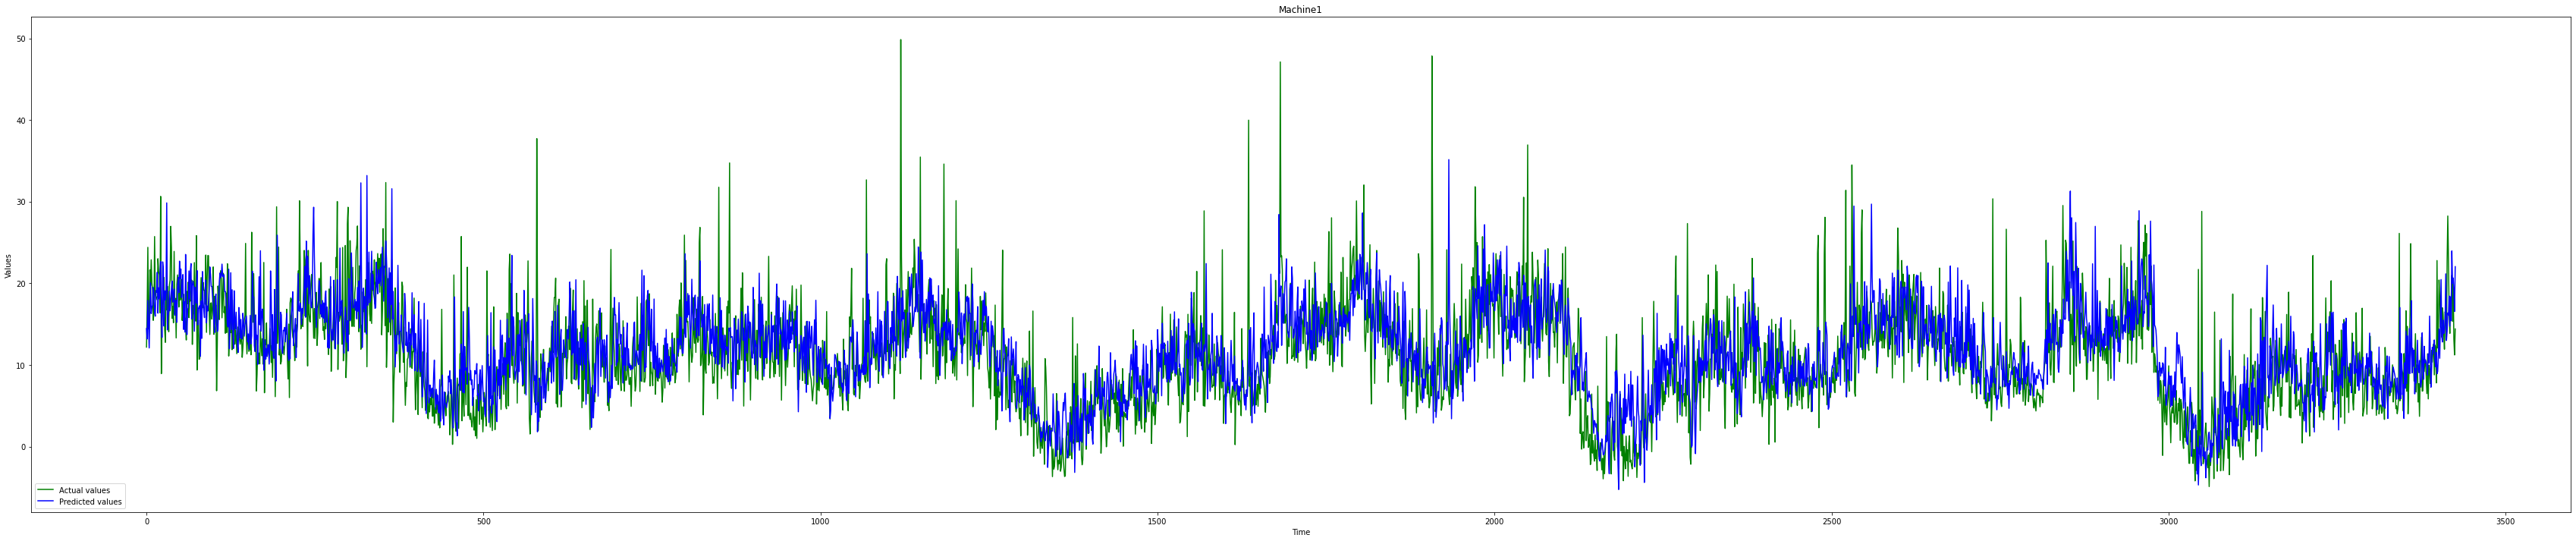

In [34]:
plt.figure(figsize=(60, 12))
plt.plot(actuals,color='green',label='Actual values')  #actual
plt.plot(preds1,color='blue',label='Predicted values')    #prediction
plt.legend(loc='lower left')
plt.title('Machine1')
plt.xlabel('Time')
plt.ylabel('Values')

plt.show()

In [91]:
from keras.models import model_from_yaml

model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk
